# Image Editing Notebook

In [ ]:
import cv2
#We are importinh cv2 linrary which contains all the functions for image editing we need
import numpy as np
#We also need to import numpy which is a library used to deal with arrays and perform calculations on it efficiently.
import matplotlib.pyplot as plt
%matplotlib inline
#At last we'll import matplotlib which will helps us to show the images in our notebook.abs

## Basic Editing Techniques

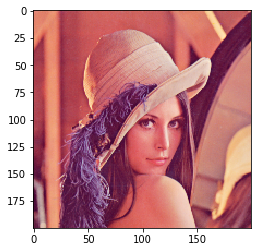

In [81]:
imgs = cv2.imread('images/Lenna_.png')
# imread funcion of cv2 reads any image in format of BGR rather than RGB
img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
# Thus we convert the image from BGR to RGB using the above function
img= cv2.resize(img,(200,200))
#We shrniked the image (we'll se later what is shrinking.)
plt.imshow(img)
#plt.imshow() displays the image on the notebook as below

### __1.Cropping__

Text(0.5, 1.0, 'Face Cropped Image')

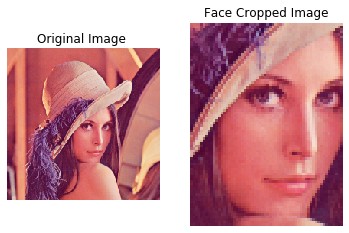

In [82]:
# Cropping image 
x, y= 75,75
#To crop the image we need a rectangle. Thus we need to decide the top left
# corner of the rectangle and decide its width and height 
h,w= 60,80
# For taking face as you can observe in the above pic face top left corner is around (75,75)
# We'll take 80 px and 60 px as width and height of the image
crop = img[x:x+w,y:y+h]
# After getting the required x,y,w,h just use this line which will extract the region of interest from the original image

fig = plt.figure()
#Two display images side by side we have created a plot figure.

ax1 = fig.add_subplot(1,2,1)
# We'll add a subplot (1,2,1) - here first two represent the dimensions of 
                            #  image grid which we want and the third number indicates the position of image with
                            # 1-indexing. So (1,2,1) means in 1x2 grid we are plotting on 1st position
ax1.imshow(img)
#Plotted on (1,2,1)
ax1.axis('off')
#Removes the axes markings
ax1.set_title('Original Image ')
#A title for the plot shown above the image

#Similarly we do for the second image (Note than we are plotting this time on 2nd position i.e. (1,2,2))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(crop)
ax2.axis('off')
ax2.set_title('Face Cropped Image')

### 2.Flipping

Text(0.5, 1.0, 'Vertical Flip')

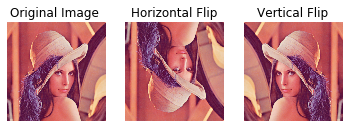

In [83]:
# Flip image
flip0= cv2.flip(img,0)
flip1= cv2.flip(img,1)
# For lipping the image we need to use cv2.flip() function
# and pass the axis parameter on which we have to flip the image
# 0 - indicates horizontal axis for flipping
# 1-  indicates vertical axis for flippping


fig = plt.figure()
#This is again the same plotting of images as explained earlier
# only difference is that here we are making an
# image grid of 1x3

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(flip0)
ax2.axis('off')
ax2.set_title('Horizontal Flip')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(flip1)
ax3.axis('off')
ax3.set_title('Vertical Flip')



### 3.Resizing

Reduced shape -  (128, 128, 3)
Original shape -  (200, 200, 3)
Enlarged shape -  (256, 256, 3)


Text(0.5, 1.0, 'Enlarged (256,256)')

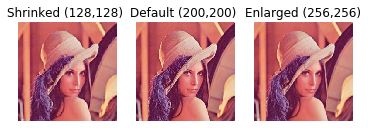

In [84]:
# Resize
imk= img
smal= cv2.resize(imk,(128,128))
larg = cv2.resize(imk,(256,256))
# cv2.resize() function accepts source image as an argument and a tuple of required 
# dimension it may be larger or smaller than the original size we need not to specify 
# whether we are shrinking or enlarging the image

print("Reduced shape - ", smal.shape)  
print("Original shape - ", imk.shape)
print("Enlarged shape - ", larg.shape)
# .shape prints the shape of the image lxbxc where l = length, b=breadth, c= channels(RGB)

fig = plt.figure()
# We already saw how to plot the images in the image grid
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(smal)
ax1.axis('off')
ax1.set_title('Shrinked (128,128) ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imk)
ax2.axis('off')
ax2.set_title('Default (200,200) ')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(larg)
ax3.axis('off')
ax3.set_title('Enlarged (256,256)')



## Advance Editing


### 1.Grayscaling and Thresholding

---------SOURCE IMAGE---------


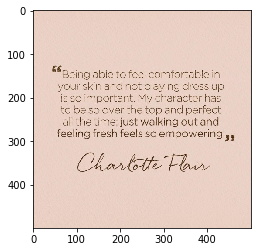

In [87]:
# Grayscaling and Thresholding
image= cv2.imread('images/text.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# Now we are moving to advance editing techniques 
# We have takena nother image of text and converted to RGB
print("---------SOURCE IMAGE---------")

---------GRAYSCALE IMAGE---------


(-0.5, 499.5, 499.5, -0.5)

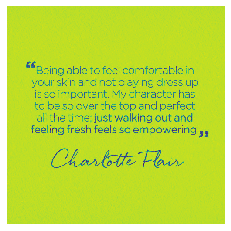

In [88]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#The cvtColor convertes the image from BGR to Gray and thus reducing the channels from 3 to 1
print("---------GRAYSCALE IMAGE---------")
plt.imshow(gray)
plt.axis('off')


---------THRESHOLD IMAGE (SIMPLE)---------


(-0.5, 499.5, 499.5, -0.5)

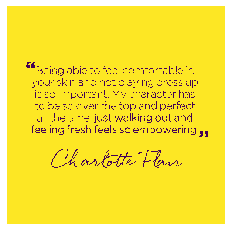

In [90]:
_, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# Threshhold function performs thresholding based on threshold given (here 127) and maxval given( here 255)
# So all pix > 127 = 255 & pix <= 255 =0
# Notice that we have also passed Thresh binary i.e. type of thresholding we want
# We have seen the types of thresholding in the markdown document.
print("---------THRESHOLD IMAGE (SIMPLE)---------")
plt.imshow(thresh)
plt.axis('off')

---------THRESHOLD IMAGE (ADAPTIVE)---------


(-0.5, 499.5, 499.5, -0.5)

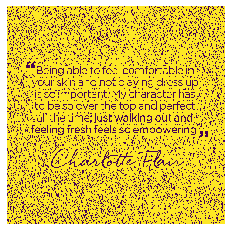

In [91]:
#Types of Thresholding
thresh_adapive = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
# Just another type of thresholding which selects threshold based on neigbouring areas.
# Thats's why you can see it sometimes creates noises in the plain images.          
print("---------THRESHOLD IMAGE (ADAPTIVE)---------")
plt.imshow(thresh_adapive)
plt.axis('off')

---------THRESHOLD IMAGE (OTSU)---------


(-0.5, 499.5, 499.5, -0.5)

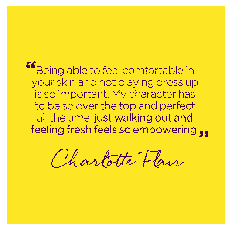

In [92]:
_,thresh_otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Using Otsu threshold by passing Thresh_otsu as argument to the function
print("---------THRESHOLD IMAGE (OTSU)---------")
plt.imshow(thresh_otsu)
plt.axis('off')

### 2.Blur

---------SOURCE IMAGE---------


(-0.5, 249.5, 199.5, -0.5)

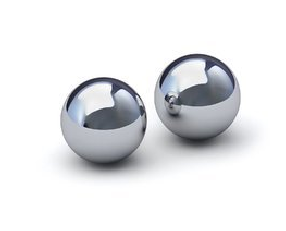

In [93]:
#Blur 
face = cv2.imread('images/face.png')
fk= cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

# For blur operation example we'll take another image and convert to RGB

print("---------SOURCE IMAGE---------")
plt.imshow(fk)
plt.axis('off')

##### Averaging Blur

---------BLURRED IMAGE (SIMPLE) ---------


(-0.5, 249.5, 199.5, -0.5)

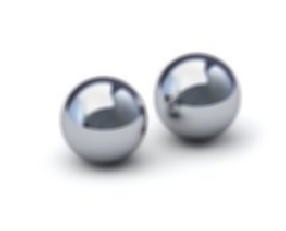

In [94]:
blur = cv2.blur(fk,(5,5))

# Normal Blur operation done by simply running a 5x5 kernel 
# (5,5) tuple passed in argument defines the size of kernel yo want for the operation
# The size of the kernel is usually odd and is same for length and breadth.
print("---------BLURRED IMAGE (SIMPLE) ---------")
plt.imshow(blur)
plt.axis('off')


#### Gaussian Blur

---------BLURRED IMAGE (GAUSSIAN) ---------


(-0.5, 249.5, 199.5, -0.5)

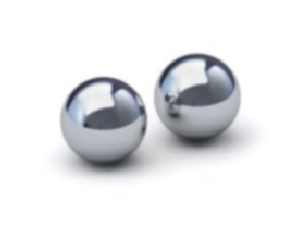

In [95]:
blur2=cv2.GaussianBlur(fk,(5,5),0)
# Since we are using Gaussian blur apart from kernel we need mean also 
# So the third parameter passed is the mean and firest two are similar to the above function

print("---------BLURRED IMAGE (GAUSSIAN) ---------")
plt.imshow(blur2)
plt.axis('off')


### Median Blur

---------BLURRED IMAGE (MEDIAN) ---------


(-0.5, 249.5, 199.5, -0.5)

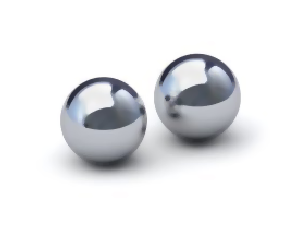

In [96]:
blur3= cv2.medianBlur(fk,5)
# The medain also needs the kernel size its same as first blur operation 
# only difference being is that it uses medain for calculation.
print("---------BLURRED IMAGE (MEDIAN) ---------")
plt.imshow(blur3)
plt.axis('off')

#### Bilateral Filtering

---------BLURRED IMAGE (BILATERAL) ---------


(-0.5, 249.5, 199.5, -0.5)

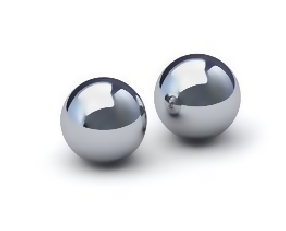

In [97]:
blur4= cv2.bilateralFilter(fk,9,75,75)
# BilateralFiltering is an advance method of blurring
# Its needs more parameters for calculation
# First one is source image
# Second parameter is the kernel size
# Third and Fourth values are sigma Color ans sigma Space values
# which decides the strength of blurness

print("---------BLURRED IMAGE (BILATERAL) ---------")
plt.imshow(blur4)
plt.axis('off')

### 3. Smoothening

---------SOURCE IMAGE ---------


(-0.5, 859.5, 852.5, -0.5)

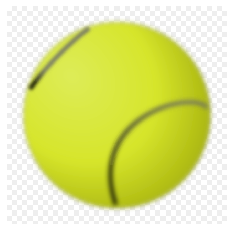

In [98]:
# Smoothening
imk = cv2.imread('images/blurred.png')
# We take another example for this operation and again first convert 
# the source image to RGB

plt.imshow(cv2.cvtColor(imk, cv2.COLOR_BGR2RGB))
print("---------SOURCE IMAGE ---------")
plt.axis('off')



(-0.5, 859.5, 852.5, -0.5)

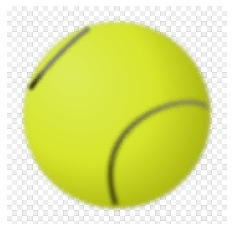

In [73]:
kernel = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), 
dtype="int")
# This kernel is a popular kernel and is mostly used for 
# removing noise and sharpen the image a bit
imk= cv2.filter2D(imk, -1, kernel)
# We just convolve the image with the above kernel
# using cv2.filter2D function to apply the operation

#Show the image
image= cv2.cvtColor(imk, cv2.COLOR_BGR2RGB)
print("---------SHARPENED IMAGE ---------")
plt.imshow(image)
plt.axis('off')


In [3]:
#  -------------- Author Details ----------- 
#      Name - Anshuman Srivastava            
#      College- BIT Mesra, Ranchi             
#      Stream - IT                              
#      Session - 2018-2022                      
#                                                
#     Social Links to Contact            
    
#     [Github](https://github.com/anshumyname/)
#     [Linkedin](https://www.linkedin.com/in/anshuman-srivastava-84a0b3188/)
#     [Gmail](mailto:srivastavaanshuman33@gmail.com)    
#  -------------------------------------